In [7]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

In [8]:
# The tech stocks we'll use for this analysis
ticker = 'MSFT'

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

  
    #To set DataFrame as the Stock Ticker
    
df = web.DataReader(ticker,'yahoo',start,end)['Adj Close']

In [9]:
df.head()

Date
2018-03-13    91.630577
2018-03-14    91.087044
2018-03-15    91.407333
2018-03-16    91.814964
2018-03-19    90.155304
Name: Adj Close, dtype: float64

In [10]:
df.tail()

Date
2020-03-09    150.619995
2020-03-10    160.919998
2020-03-11    153.630005
2020-03-12    139.059998
2020-03-13    158.830002
Name: Adj Close, dtype: float64

In [11]:
df.shape

(505,)

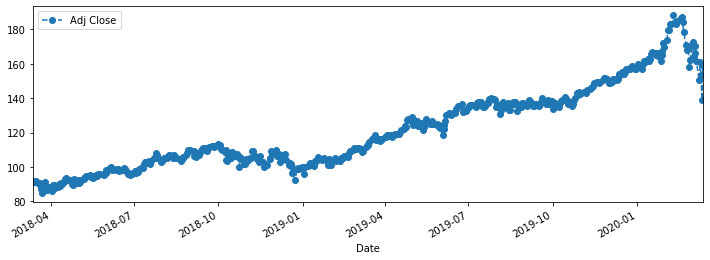

In [12]:
df.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')



In [13]:
df.describe()

count    505.000000
mean     121.705498
std       23.805923
min       84.613426
25%      103.453575
50%      113.126457
75%      137.276642
max      188.185989
Name: Adj Close, dtype: float64

In [14]:
df
df.head()

Date
2018-03-13    91.630577
2018-03-14    91.087044
2018-03-15    91.407333
2018-03-16    91.814964
2018-03-19    90.155304
Name: Adj Close, dtype: float64

In [15]:
df.describe()

count    505.000000
mean     121.705498
std       23.805923
min       84.613426
25%      103.453575
50%      113.126457
75%      137.276642
max      188.185989
Name: Adj Close, dtype: float64

In [16]:
df = df.reset_index()

In [17]:
df.head()

,Date,Adj Close
0,2018-03-13,91.630577
1,2018-03-14,91.087044
2,2018-03-15,91.407333
3,2018-03-16,91.814964
4,2018-03-19,90.155304


In [18]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [19]:
df = df[['ds','y']]
df.head(20)

mon2 = df

mon2['Weekday'] = mon2['ds'].dt.day_name()


mon2 =  mon2[(mon2['Weekday'] == 'Monday')]

mon2.head()


,ds,y,Weekday
4,2018-03-19,90.155304,Monday
9,2018-03-26,91.019112,Monday
13,2018-04-02,85.913963,Monday
18,2018-04-09,88.097717,Monday
23,2018-04-16,91.397629,Monday


In [20]:
# Importing the prophet library:

import fbprophet

In [21]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [22]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2018-03-13
1,2018-03-14
2,2018-03-15
3,2018-03-16
4,2018-03-19


In [24]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail(10)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
860,2021-03-04,200.169316,141.859601,267.880786,139.084461,264.688746,3.650330,3.650330,3.650330,-1.135687,-1.135687,-1.135687,4.786017,4.786017,4.786017,0.0,0.0,0.0,203.819646
861,2021-03-05,200.272018,141.396912,267.799301,138.960499,265.096814,3.144484,3.144484,3.144484,-1.084523,-1.084523,-1.084523,4.229007,4.229007,4.229007,0.0,0.0,0.0,203.416502
862,2021-03-06,200.374721,144.571002,270.630267,138.836537,265.436176,6.858716,6.858716,6.858716,3.115844,3.115844,3.115844,3.742871,3.742871,3.742871,0.0,0.0,0.0,207.233436
863,2021-03-07,200.477423,144.579684,272.408695,138.712575,265.668425,6.446707,6.446707,6.446707,3.115844,3.115844,3.115844,3.330863,3.330863,3.330863,0.0,0.0,0.0,206.924130
864,2021-03-08,200.580125,138.681204,267.562031,138.588614,265.883757,1.482653,1.482653,1.482653,-1.511971,-1.511971,-1.511971,2.994624,2.994624,2.994624,0.0,0.0,0.0,202.062778
865,2021-03-09,200.682827,139.369845,266.398576,138.471585,266.099088,1.463804,1.463804,1.463804,-1.270371,-1.270371,-1.270371,2.734175,2.734175,2.734175,0.0,0.0,0.0,202.146631
866,2021-03-10,200.785530,137.690989,266.934655,138.361954,266.347425,1.318809,1.318809,1.318809,-1.229137,-1.229137,-1.229137,2.547945,2.547945,2.547945,0.0,0.0,0.0,202.104338
867,2021-03-11,200.888232,139.478658,268.893847,138.252323,266.740781,1.297148,1.297148,1.297148,-1.135687,-1.135687,-1.135687,2.432835,2.432835,2.432835,0.0,0.0,0.0,202.185380
868,2021-03-12,200.990934,138.521862,268.598164,138.131688,267.133094,1.299795,1.299795,1.299795,-1.084523,-1.084523,-1.084523,2.384318,2.384318,2.384318,0.0,0.0,0.0,202.290729
869,2021-03-13,201.093636,142.564537,273.278159,137.917492,267.525407,5.512421,5.512421,5.512421,3.115844,3.115844,3.115844,2.396577,2.396577,2.396577,0.0,0.0,0.0,206.606057


In [62]:
forecast['Weekday'] = forecast['ds'].dt.day_name()

forecast

mon =  forecast[(forecast['Weekday'] == 'Monday')]

mon = mon[['ds','yhat']]

Stockpre = pd.merge(mon, mon2, on ='ds')

Stockpre["tom"] = Stockpre["yhat"].shift(-1)

Stockpre.head(200)

,ds,yhat,y,Weekday,tom
0,2018-03-19,87.664662,90.155304,Monday,89.936328
1,2018-03-26,89.936328,91.019112,Monday,90.445855
2,2018-04-02,90.445855,85.913963,Monday,89.833628
3,2018-04-09,89.833628,88.097717,Monday,90.126638
4,2018-04-16,90.126638,91.397629,Monday,92.051434
...,...,...,...,...,...
91,2020-02-03,172.741992,173.904999,Monday,176.065642
92,2020-02-10,176.065642,188.185989,Monday,171.817188
93,2020-02-24,171.817188,170.889999,Monday,166.881637
94,2020-03-02,166.881637,172.789993,Monday,164.365292


In [63]:
yhat = delta = total = cost = 0.0
status = "cash"
first = Stockpre['y'][0]
final = Stockpre['y'].iloc[-1]
boring = final - first
tradecount = 0

log = pd.DataFrame(columns=['Date', 'Action', 'Stock Price', 'Predicted Value','Profit', 'Trade Count'])
 

for index, row in Stockpre.iterrows():
    print(index)
    print(f" On {row['ds']}")
    #check predicition value for next week "yhat" vs the current ticker value "current"
    if row['tom'] >= row['y']:
        #If holding cash, initiate buy, set cost to current stock price 'y' 
        #reset "current" for comparison, change status to holding stock 
        if status == "cash":
            tradecount =  tradecount + 1
            cost = row['y']
            print(f" bought stock @ {cost}: price {row['y']} vs {row['tom']} ")
                  
            log = log.append({'Date': row['ds'], 'Action': 'BUY', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

            status = "hold"
        
        elif status == "hold":
            print(f" held stock @ cost {cost} : price {row['y']} vs {row['tom']}")
            log = log.append({'Date': row['ds'], 'Action': 'HOLD STOCK', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

    elif row['tom'] < row['y']:
        if status == "hold":
            tradecount =  tradecount + 1
            print(f" sold @ cost {cost} : price {row['y']} vs {row['tom']}")           
            delta = row['y'] - cost
            total = total + delta
            status = "cash"
            cost = 0.0
            print(f" profit {delta}")
                  
            log = log.append({'Date': row['ds'], 'Action': 'SELL', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)
            
                  
        elif status == "cash" :
            
            print(f" held cash : price {row['y']} vs {row['tom']}")
                                    
            log = log.append({'Date': row['ds'], 'Action': 'HOLD CASH', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

if status == "hold":
    delta = final - cost
    total = total + delta 
    print(f"Final Networth :  cash {total}")
    
    log = log.append({'Date': Stockpre['ds'].iloc[-1], 'Action': 'FINAL SELL', 'Stock Price': Stockpre['y'].iloc[-1], 'Profit' : total,
                    'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)
                  
if status == "cash":
    print(f"Final Networth :  cash {total}")
    
    log = log.append({'Date': Stockpre['ds'].iloc[-1], 'Action': 'HELD CASH', 'Stock Price': Stockpre['y'].iloc[-1], 'Profit' : total,
                    'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

print(f"If you had bought and held from day 1, {first} to {final}, you'd have made {boring} ")


0
 On 2018-03-19 00:00:00
 held cash : price 90.15530395507812 vs 89.93632814854648
1
 On 2018-03-26 00:00:00
 held cash : price 91.01911163330078 vs 90.44585487376474
2
 On 2018-04-02 00:00:00
 bought stock @ 85.9139633178711: price 85.9139633178711 vs 89.83362754420413 
3
 On 2018-04-09 00:00:00
 held stock @ cost 85.9139633178711 : price 88.09771728515625 vs 90.12663773357512
4
 On 2018-04-16 00:00:00
 held stock @ cost 85.9139633178711 : price 91.39762878417969 vs 92.05143420183545
5
 On 2018-04-23 00:00:00
 held stock @ cost 85.9139633178711 : price 92.54287719726562 vs 94.12862131509019
6
 On 2018-04-30 00:00:00
 held stock @ cost 85.9139633178711 : price 90.76675415039062 vs 94.52957469485239
7
 On 2018-05-07 00:00:00
 sold @ cost 85.9139633178711 : price 93.38726806640625 vs 93.34455581537524
 profit 7.473304748535156
8
 On 2018-05-14 00:00:00
 held cash : price 95.14398956298828 vs 92.5167410796153
9
 On 2018-05-21 00:00:00
 bought stock @ 95.1372299194336: price 95.1372299194

In [64]:
# Visualisation:
log
# m.plot(forecast);

,Date,Action,Stock Price,Predicted Value,Profit,Trade Count
0,2018-03-19,HOLD CASH,90.155304,89.936328,0.000000,0
1,2018-03-26,HOLD CASH,91.019112,90.445855,0.000000,0
2,2018-04-02,BUY,85.913963,89.833628,0.000000,1
3,2018-04-09,HOLD STOCK,88.097717,90.126638,0.000000,1
4,2018-04-16,HOLD STOCK,91.397629,92.051434,0.000000,1
...,...,...,...,...,...,...
91,2020-02-03,HOLD STOCK,173.904999,176.065642,113.418655,31
92,2020-02-10,SELL,188.185989,171.817188,144.443909,32
93,2020-02-24,HOLD CASH,170.889999,166.881637,144.443909,32
94,2020-03-02,HOLD CASH,172.789993,164.365292,144.443909,32


In [ ]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
forecast.shape

In [ ]:
forecast.describe()